In [1]:
# !pip install seaborn
# !pip install xgboost
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip3 install -U scikit-learn
# !pip install keras
# !pip install tensorflow
# !pip install openpyxl
# !pip install xlrd

### Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

#### Read the data

In [3]:
df = pd.read_csv("Kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### check for null values

In [4]:
df.isnull().sum().sort_values(ascending = False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
pcc                 4
ba                  4
dm                  2
htn                 2
cad                 2
appet               1
ane                 1
pe                  1
id                  0
classification      0
dtype: int64

#### List of numerical and catagorical variables

In [5]:
cols_numeric = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
cols_cat     = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

#### function to convert string columns to ints and floats

In [6]:
def str_to_int(df, col):
  df[col] = df[col].replace(to_replace='\?', value=np.nan, regex=True)
  df[col] = df[col].replace(to_replace=np.nan, value=0, regex=True)
  df[col] = df[col].astype(int)
  df[col] = df[col].replace(to_replace=0, value=np.nan, regex=True)
  return df

def str_to_float(df, col):
  df[col] = df[col].replace(to_replace='\?', value=np.nan, regex=True)
  df[col] = df[col].replace(to_replace=np.nan, value=0.0, regex=True)
  df[col] = df[col].astype(float)
  df[col] = df[col].replace(to_replace=0.0, value=np.nan, regex=True)
  return df

In [7]:
df = str_to_int(df, "pcv")
df = str_to_int(df, "wc")
df = str_to_float(df, "rc")

In [8]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


#### Fill missing values with mean of each numeric column and median for each catagorical column

In [9]:
for col_name in cols_numeric:
  df[col_name] = df[col_name].fillna((df[col_name].mean()))
  
df = df.fillna(df.mode().iloc[0])

#### Encoder catagorical varable into intergers

In [10]:
encoders = {}

for col_name in cols_cat:
  le = LabelEncoder()
  encoders[col_name] = le
  df[col_name] = le.fit_transform(df[col_name].values)

#### Varify missing values imputation

In [11]:
df.isnull().sum().sort_values(ascending = False)

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

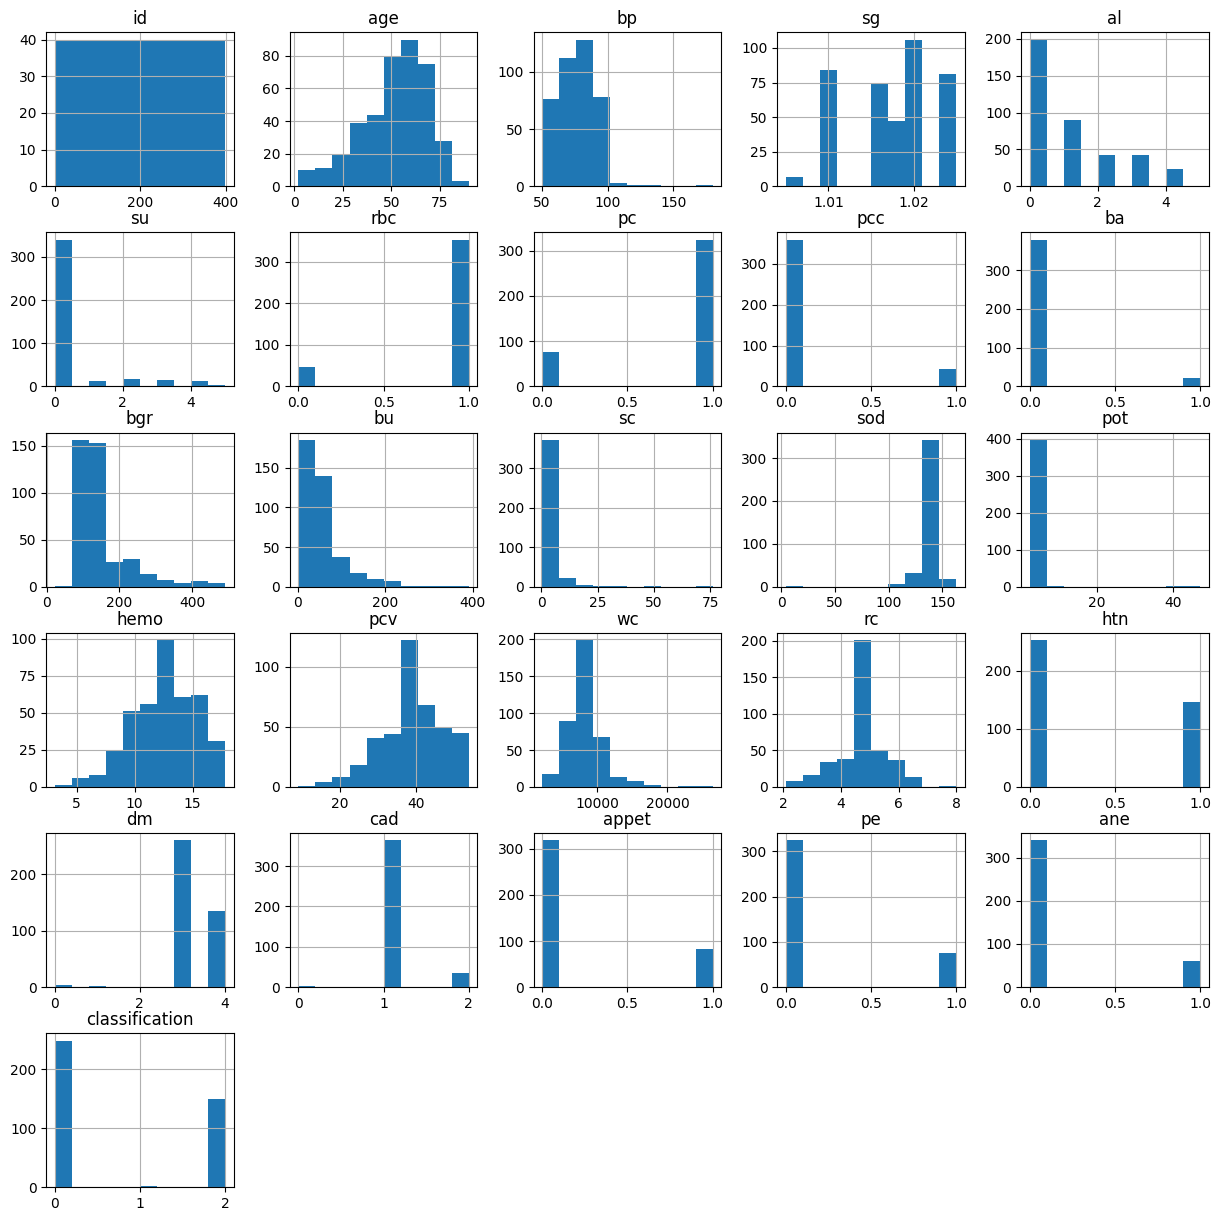

In [12]:
df.hist(figsize = (15, 15))
plt.show()

In [13]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

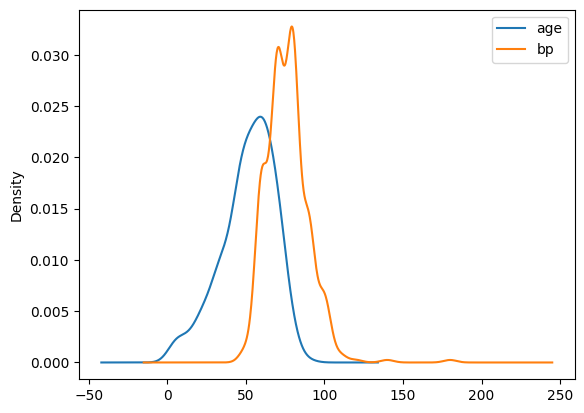

In [14]:
ax = df[["age", "bp"]].plot.kde()

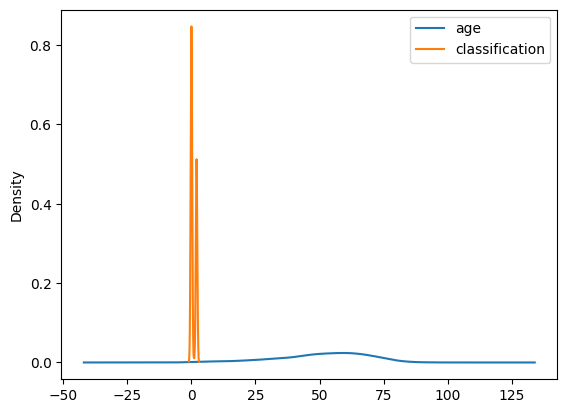

In [15]:
ax = df[["age", "classification"]].plot.kde()

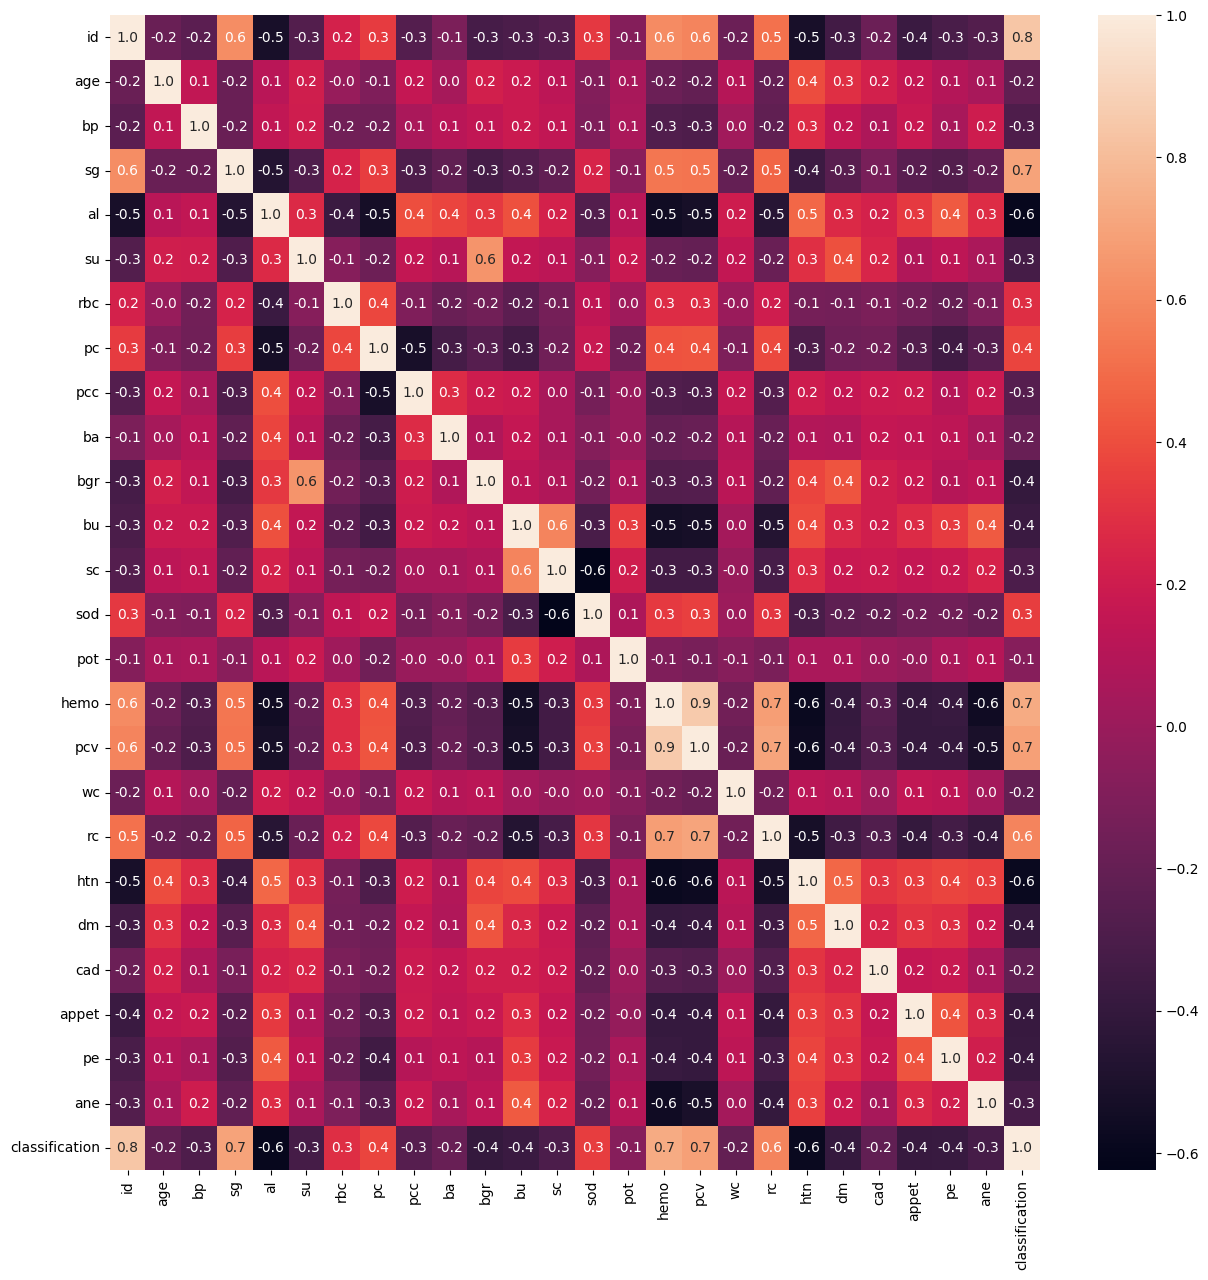

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

#### Separate the target varaible y and input variable X

In [17]:
y = df["classification"].values
df = df.drop(["id", "classification"], axis=1, inplace=False)
X = df.values

#### Divide the dataset into training and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
table_acc = {}
table_p  = {}
table_r  = {}
table_f1  = {}

#### Apply random forest classifier

In [20]:
clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1_sc = f1_score(y_test, y_pred, average='macro')

accuracy = np.round(accuracy, 3)*100
p = np.round(p, 3)*100
r = np.round(r, 3)*100
f1_sc = np.round(f1_sc, 3)*100

print("accuracy:", accuracy)
print("precision:", p)
print("recall:", r)
print("f1_score:", f1_sc)

table_acc["RF"] = accuracy
table_p["RF"] = p
table_r["RF"] = r
table_f1["RF"]  = f1_sc

accuracy: 100.0
precision: 100.0
recall: 100.0
f1_score: 100.0


#### RF cross validation¶

In [21]:
clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print("mean accuracy for 10 fold cross validation",scores.mean() )

mean accuracy for 10 fold cross validation 0.985


#### Logistic Regression

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')


f1_sc = f1_score(y_test, y_pred, average='macro')

accuracy = np.round(accuracy, 3)*100
p = np.round(p, 3)*100
r = np.round(r, 3)*100
f1_sc = np.round(f1_sc, 3)*100

print("accuracy:", accuracy)
print("precision:", p)
print("recall:", r)
print("f1_score:", f1_sc)

table_acc["LR"] = accuracy
table_p["LR"] = p
table_r["LR"] = r
table_f1["LR"]  = f1_sc

accuracy: 92.5
precision: 91.3
recall: 92.60000000000001
f1_score: 91.9


#### Logistic Regression CV 

In [23]:
log_reg = LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print("mean accuracy for 10 fold cross validation",scores.mean() )

mean accuracy for 10 fold cross validation 0.8949999999999999


#### KNN 

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1_sc = f1_score(y_test, y_pred, average='macro')

accuracy = np.round(accuracy, 3)*100
p = np.round(p, 3)*100
r = np.round(r, 3)*100
f1_sc = np.round(f1_sc, 3)*100

print("accuracy:", accuracy)
print("precision:", p)
print("recall:", r)
print("f1_score:", f1_sc)

table_acc["KNN"] = accuracy
table_p["KNN"] = p
table_r["KNN"] = r
table_f1["KNN"]  = f1_sc

accuracy: 93.8
precision: 92.4
recall: 95.19999999999999
f1_score: 93.4


#### KNN Cross Validation

In [25]:
neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(neigh, X, y, cv=10)
print("mean accuracy for 10 fold cross validation",scores.mean() )

mean accuracy for 10 fold cross validation 0.7675


#### Apply XGBOOST model

In [26]:
xgb_model = xgb.XGBClassifier()
# xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1_sc = f1_score(y_test, y_pred, average='macro')


accuracy = np.round(accuracy, 3)*100
p = np.round(p, 3)*100
r = np.round(r, 3)*100
f1_sc = np.round(f1_sc, 3)*100

print("accuracy:", accuracy)
print("precision:", p)
print("recall:", r)
print("f1_score:", f1_sc)

table_acc["XGB"] = accuracy
table_p["XGB"] = p
table_r["XGB"] = r
table_f1["XGB"]  = f1_sc

accuracy: 98.8
precision: 98.3
recall: 99.0
f1_score: 98.6


#### Apply XGBOOST Cross Validation

In [27]:
xgb_model = xgb.XGBClassifier()
scores = cross_val_score(xgb_model, X, y, cv=10)
print("mean accuracy for 10 fold cross validation",scores.mean() )

mean accuracy for 10 fold cross validation 0.9775


#### Apply Bernoulli Naive Bayes

In [28]:
NB = BernoulliNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1_sc = f1_score(y_test, y_pred, average='macro')

accuracy = np.round(accuracy, 3)*100
p = np.round(p, 3)*100
r = np.round(r, 3)*100
f1_sc = np.round(f1_sc, 3)*100

print("accuracy:", accuracy)
print("precision:", p)
print("recall:", r)
print("f1_score:", f1_sc)

table_acc["NB"] = accuracy
table_p["NB"] = p
table_r["NB"] = r
table_f1["NB"]  = f1_sc

accuracy: 91.2
precision: 89.9
recall: 91.60000000000001
f1_score: 90.60000000000001


In [29]:
#### Apply Bernoulli Naive Bayes Cross Validation

In [30]:
NB = BernoulliNB()
scores = cross_val_score(NB, X, y, cv=10)
print("mean accuracy for 10 fold cross validation",scores.mean() )

mean accuracy for 10 fold cross validation 0.9199999999999999


#### Apply Decision Tree Classifier 

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1_sc = f1_score(y_test, y_pred, average='macro')

accuracy = np.round(accuracy, 3)*100
p = np.round(p, 3)*100
r = np.round(r, 3)*100
f1_sc = np.round(f1_sc, 3)*100

print("accuracy:", accuracy)
print("precision:", p)
print("recall:", r)
print("f1_score:", f1_sc)

table_acc["DT"] = accuracy
table_p["DT"] = p
table_r["DT"] = r
table_f1["DT"]  = f1_sc

accuracy: 98.8
precision: 66.7
recall: 66.0
f1_score: 66.3


#### Apply Decision Tree Classifier Cross Validation

In [32]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=10)
print("mean accuracy for 10 fold cross validation",scores.mean() )

mean accuracy for 10 fold cross validation 0.9574999999999999


### Apply Neural Networks model

In [33]:
from keras.layers import Dense

from tensorflow.keras import Model, Input
from keras.utils import to_categorical
from keras.optimizers import Adam

2025-03-11 11:56:02.677862: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 11:56:02.678625: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 11:56:02.680540: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 11:56:02.686303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741676162.697871  613659 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741676162.70

In [34]:
y_train_1 = to_categorical(y_train, num_classes=3)
y_test_1  = to_categorical(y_test, num_classes=3)

In [35]:
y_train_1.shape, X_train.shape

((320, 3), (320, 24))

In [36]:
# inp = Input(shape=(24,), name="input_1")
# x = Dense(100, name="Dense_1")(inp)
# x = Dense(10, name="Dense_2")(x)
# out = Dense(3, activation="softmax", name="output_1")(x)

# model  = Model(inputs = inp, outputs= out , name="Neural_network_model")
# opt = Adam(learning_rate=0.001)
# model.compile(optimizer=opt, metrics=["acc"], loss="binary_crossentropy")
# print(model.summary())

# history_obj = model.fit(X_train, y_train_1, epochs=100, validation_data=(X_test, y_test_1))


from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model
inp = Input(shape=(24,), name="input_1")
x = Dense(100, name="Dense_1")(inp)
x = Dense(10, name="Dense_2")(x)
out = Dense(3, activation="softmax", name="output_1")(x)

model = Model(inputs=inp, outputs=out, name="Neural_network_model")

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, metrics=["acc"], loss="binary_crossentropy")

# Print the model summary
print(model.summary())

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  # Path where the best model will be saved
    monitor='val_acc',         # Metric to monitor (validation accuracy)
    save_best_only=True,       # Save only the best model
    mode='max',                # Mode to determine the best model (max for accuracy)
    verbose=1                  # Print a message when the best model is saved
)



W0000 00:00:1741676163.682311  613659 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "Neural_network_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_1 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,543 (13.84 KB)

 Trainable params: 3,543 (13.84 KB)

 Non-trainable params: 0 (0.00 B)

None


In [37]:
# history_obj = model.fit(X_train, y_train_1, epochs=100, validation_data=(X_test, y_test_1))

# Train the model with the checkpoint callback
history_obj = model.fit(
    X_train, y_train_1,
    epochs=100,
    validation_data=(X_test, y_test_1),
    callbacks=[checkpoint_callback]  # Add the callback here
)

# Load the best model at the end
model = load_model('best_model.keras')

Epoch 1/100

Epoch 1: val_acc improved from -inf to 0.65000, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.4013 - loss: 319.5885 - val_acc: 0.6500 - val_loss: 137.1401
Epoch 2/100

Epoch 2: val_acc did not improve from 0.65000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5881 - loss: 124.4577 - val_acc: 0.4000 - val_loss: 51.4881
Epoch 3/100

Epoch 3: val_acc did not improve from 0.65000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5563 - loss: 39.3805 - val_acc: 0.6500 - val_loss: 11.5358
Epoch 4/100

Epoch 4: val_acc did not improve from 0.65000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5163 - loss: 15.8989 - val_acc: 0.6500 - val_loss: 4.6956
Epoch 5/100

Epoch 5: val_acc did not improve from 0.65000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5358 - loss: 11.8067 - val_acc: 0.4000 - val_loss: 15.9978
Epoch 6/100

Epoch 6: val_acc did not improve from 0.65000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4863 - loss: 13.1489 - va

In [38]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1_sc = f1_score(y_test, y_pred, average='macro')

accuracy = np.round(accuracy, 3)*100
p = np.round(p, 3)*100
r = np.round(r, 3)*100
f1_sc = np.round(f1_sc, 3)*100

print("accuracy:", accuracy)
print("precision:", p)
print("recall:", r)
print("f1_score:", f1_sc)

table_acc["NN"] = accuracy
table_p["NN"] = p
table_r["NN"] = r
table_f1["NN"]  = f1_sc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
accuracy: 96.2
precision: 95.6
recall: 96.3
f1_score: 95.89999999999999


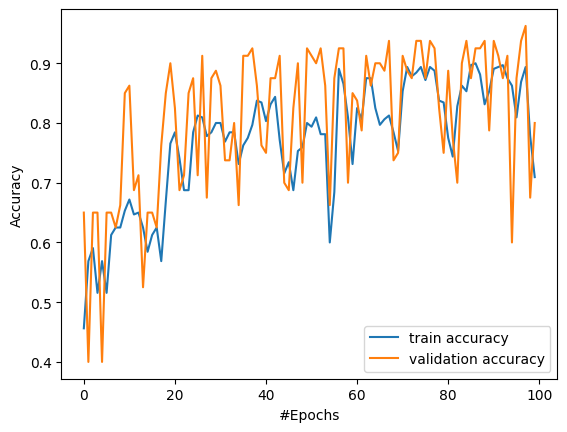

In [39]:
plt.plot(history_obj.history["acc"], label="train accuracy")
plt.plot(history_obj.history["val_acc"], label="validation accuracy")
plt.xlabel("#Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

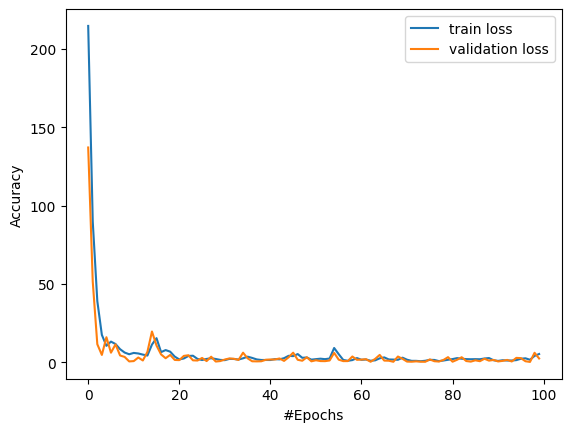

In [40]:
plt.plot(history_obj.history["loss"], label="train loss")
plt.plot(history_obj.history["val_loss"], label="validation loss")
plt.xlabel("#Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
def build_nn_model():
  inp = Input(shape=(24,), name="input_1")
  x = Dense(100, name="Dense_1")(inp)
  x = Dense(10, name="Dense_2")(x)
  out = Dense(3, activation="softmax", name="output_1")(x)
  model  = Model(inputs = inp, outputs= out , name="Neural_network_model")
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, metrics=["acc"], loss="binary_crossentropy")
  ## loss='categorical_crossentropy'
  return model

In [42]:
def k_fold_cross_validation(X, y, k, epochs):
  result_acc = []
  result_f1 = []
  fold_size = int(len(X)/k)
  prev = 0
  for i, next in enumerate(range(fold_size, len(X)+1, fold_size)):
    print("fold:", i+1)
    X_test = X[prev : next]
    X_train = np.array(list(X[:prev]) + list(X[next:]))
    y_test = y[prev : next]
    y_train = np.array(list(y[:prev]) + list(y[next:]) )
    y_train_1 = to_categorical(y_train, num_classes=3)
    y_test_1  = to_categorical(y_test, num_classes=3)
    model = build_nn_model()
    hist = model.fit(X_train, y_train_1, epochs=epochs, validation_data=(X_test, y_test_1), verbose=0)
    ##############################
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred)*100
    f1_sc = f1_score(y_test, y_pred, average='macro')*100
    result_acc.append(accuracy)
    result_f1.append(f1_sc)
    ############################
    prev = next
  return np.array(result_acc), np.array(result_f1)

In [43]:
k = 10 ### number of folds for k fold cross validation
epochs = 200

acc, f1 = k_fold_cross_validation(X, y, k, epochs)

fold: 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
fold: 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
fold: 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
fold: 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
fold: 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
fold: 6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
fold: 7
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
fold: 8
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
fold: 9
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
fold: 10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


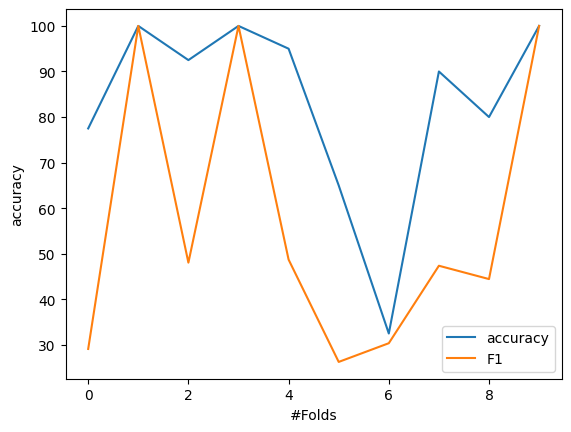

In [44]:
plt.plot(acc, label="accuracy")
plt.plot(f1, label="F1")
plt.xlabel("#Folds")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [45]:
mean_acc = acc.mean()
print("mean accuacy for", k, "fold cross validaton", mean_acc)

mean_f1 = f1.mean()
print("mean F1 for", k, "fold cross validaton", mean_f1)

mean accuacy for 10 fold cross validaton 83.25
mean F1 for 10 fold cross validaton 57.432087458584625


In [46]:
res = pd.DataFrame({"acc":table_acc, "F1":table_f1})
res = pd.DataFrame({"acc":table_acc, "P":table_p, "R":table_r, "F1":table_f1})
res.to_excel("res.xlsx")

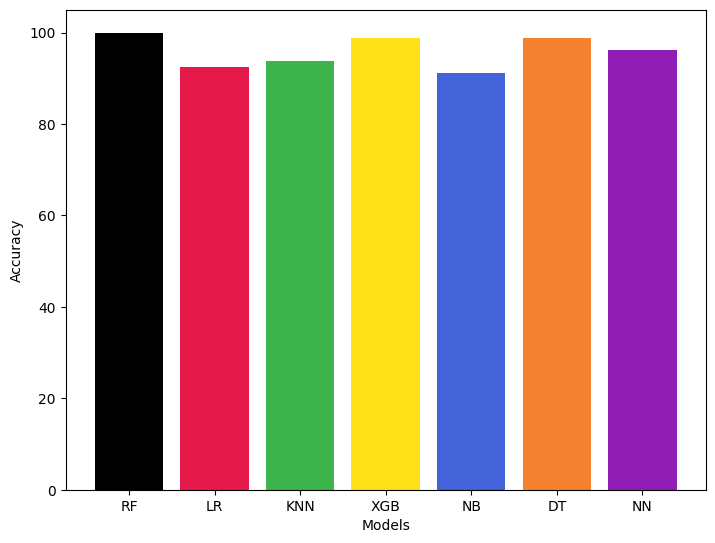

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = list(res.index)
acc = res["acc"]
# colors=['black', 'red', 'green', 'blue', 'cyan', 'black', 'blue', '#eeefff', 'orange', 'green']

colors =  ['#000000', '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
          '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',
          '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff']
ax.bar(labels, acc, color = colors[:len(acc)])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

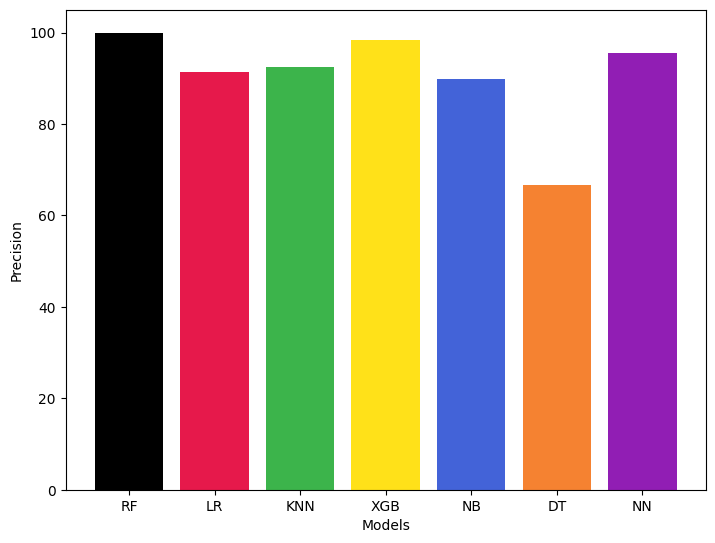

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = list(res.index)
acc = res["P"]
# colors=['black', 'red', 'green', 'blue', 'cyan', 'black', 'blue', '#eeefff', 'orange', 'green']

colors =  ['#000000', '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
          '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',
          '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff']
ax.bar(labels, acc, color = colors[:len(acc)])
plt.xlabel("Models")
plt.ylabel("Precision")
plt.show()

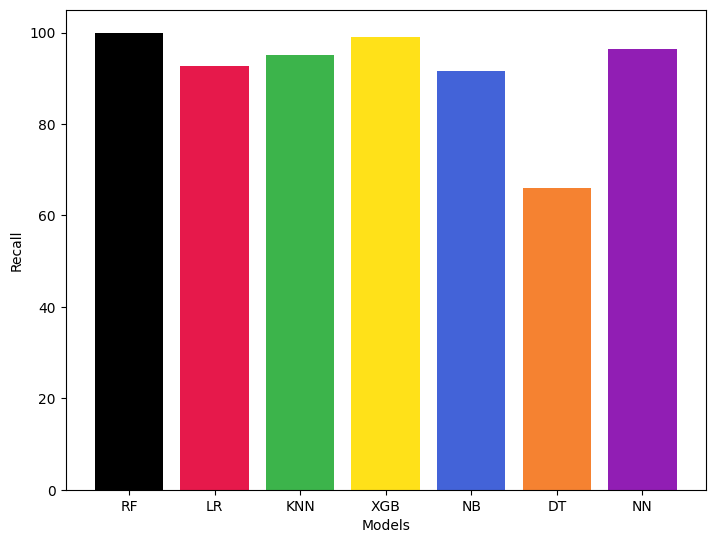

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = list(res.index)
acc = res["R"]
# colors=['black', 'red', 'green', 'blue', 'cyan', 'black', 'blue', '#eeefff', 'orange', 'green']

colors =  ['#000000', '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
          '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',
          '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff']
ax.bar(labels, acc, color = colors[:len(acc)])
plt.xlabel("Models")
plt.ylabel("Recall")
plt.show()

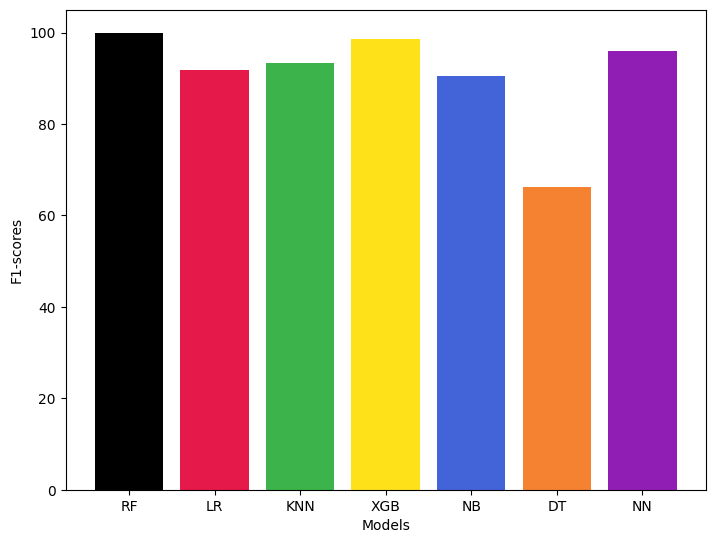

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = list(res.index)
acc = res["F1"]
# colors=['black', 'red', 'green', 'blue', 'cyan', 'black', 'blue', '#eeefff', 'orange', 'green']

colors =  ['#000000', '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
          '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',
          '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff']
ax.bar(labels, acc, color = colors[:len(acc)])
plt.xlabel("Models")
plt.ylabel("F1-scores")
plt.show()